# Animation of the near to far field

_M Kenworthy_ // Leiden Observatory kenworthy@strw.leidenuniv.nl

Uses HCIpy developed by Emiel Por, avaiable at http://hcipy.org/

Tutorial that demonstrates the Fresnel propagator: https://docs.hcipy.org/0.3.1/getting_started/2_wavefronts_optical_systems.html


In [1]:
#pip install progressbar2

In [2]:
#pip install ffpmeg

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from hcipy import *
from scenes import *

from progressbar import progressbar 

anim_version='v1'

In [49]:

# These modules are used for animating some of the graphs in our notebook.
from matplotlib import animation, rc
#from IPython.display import HTML


## HCIpy setup

Used to fine tune the plots and labels before running the animation cell below.

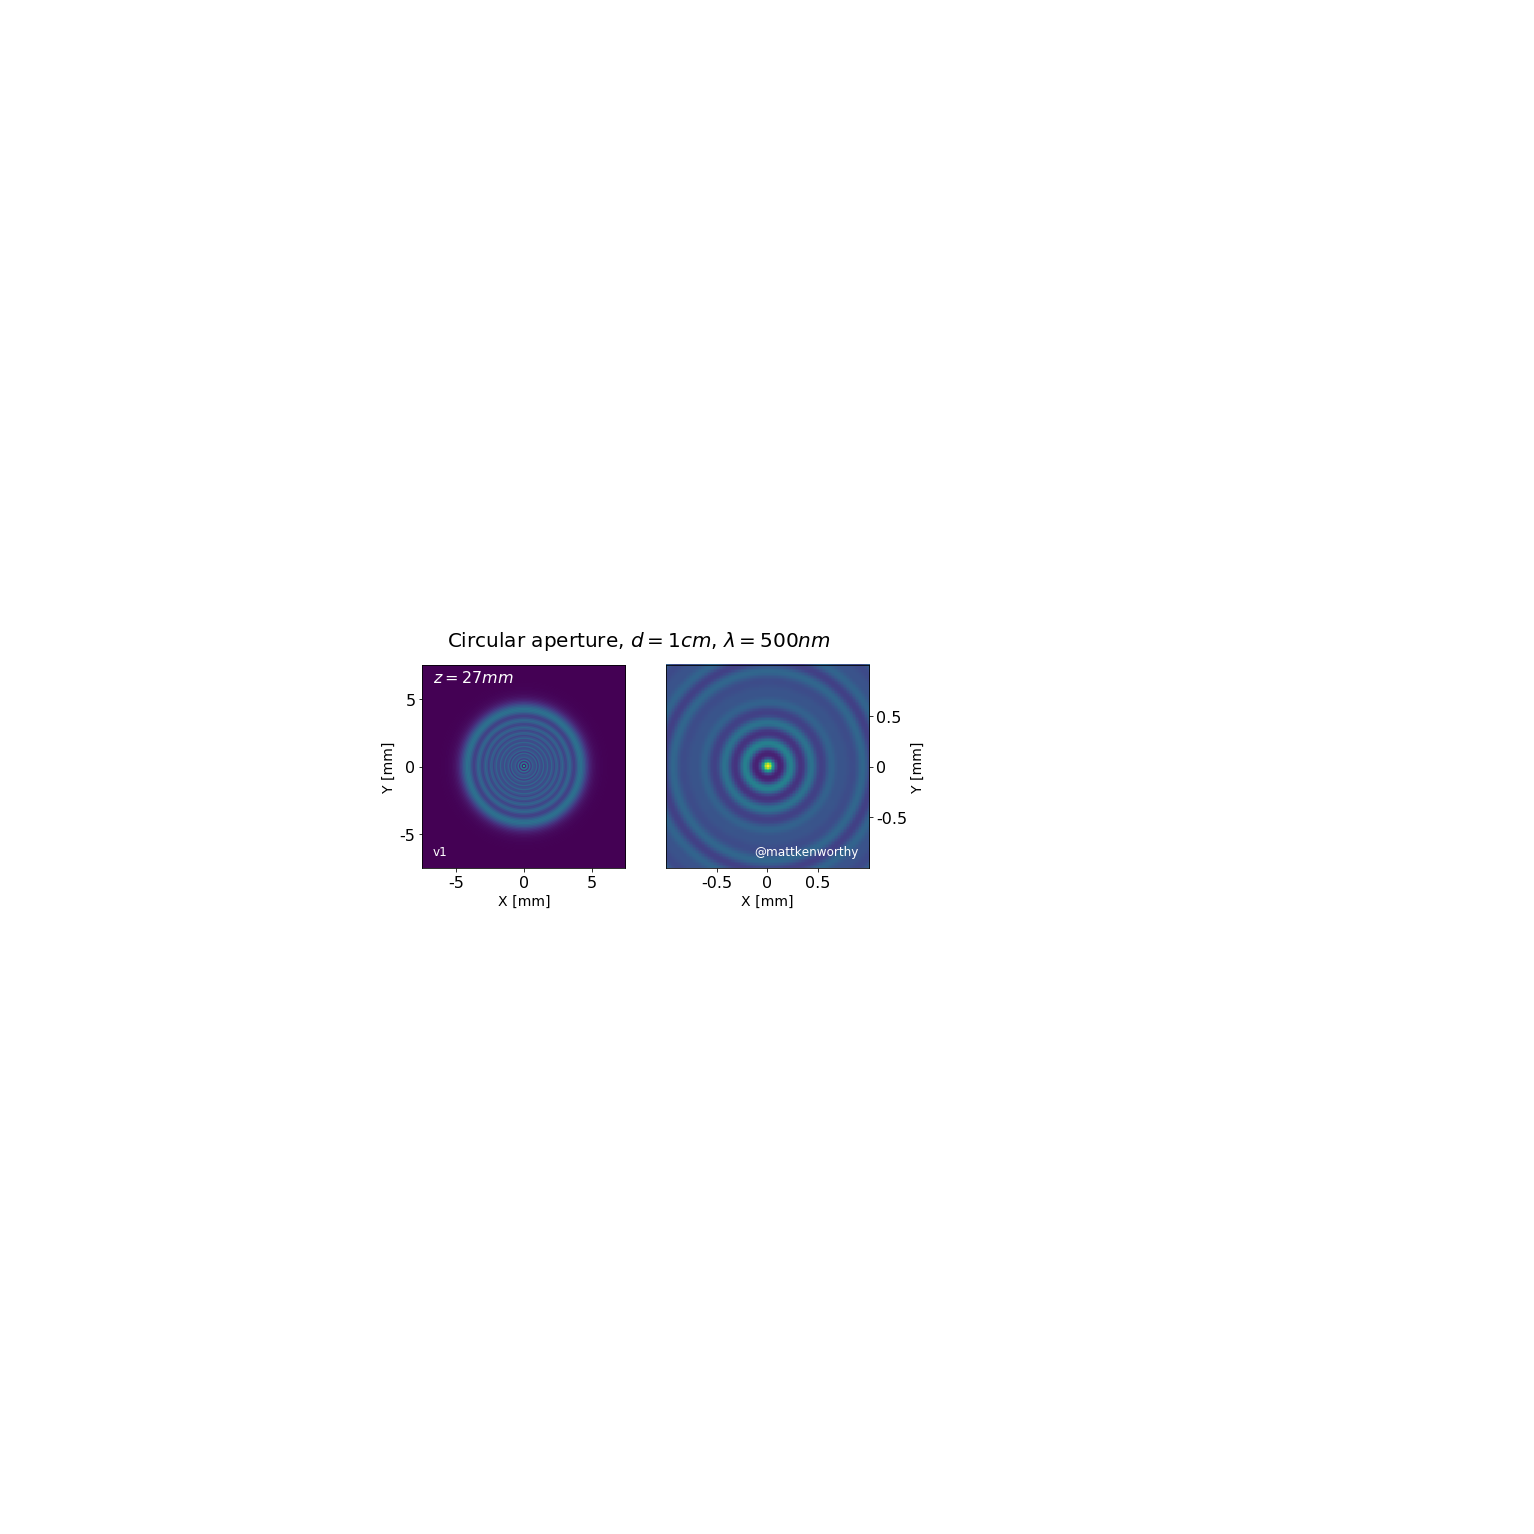

In [42]:
pupil_grid_2 = make_pupil_grid(1024, 0.015)
aperture_2 = circular_aperture(0.01)(pupil_grid_2)

fresnel_prop = FresnelPropagator(pupil_grid_2, 2)

plt.figure(figsize=(8,4))

wf = Wavefront(aperture_2, 500e-9)

plt.cla()

img = fresnel_prop(wf)

plt.suptitle('Circular aperture, $d=1cm$, $\lambda=500nm$',fontsize=20)

plt.subplot(1,2,1)

imshow_field(img.intensity)
plt.xticks(ticks=(-0.005,0,0.005), labels=(-5,0,5),fontsize=16)
plt.yticks(ticks=(-0.005,0,0.005), labels=(-5,0,5),fontsize=16)

plt.text(0.05,0.05,anim_version, fontsize=12, color='white',
        horizontalalignment='left', verticalalignment='bottom',
        transform=plt.gca().transAxes)

plt.text(0.05,0.90,'$z={:.0f}mm$'.format(27.431), fontsize=16, color='white',
        horizontalalignment='left', verticalalignment='bottom',
        transform=plt.gca().transAxes)
plt.xlabel('X [mm]',fontsize=14)
plt.ylabel('Y [mm]',fontsize=14)

# zoomed in version on right hand side
plt.subplot(1,2,2)
imshow_field(img.intensity)
plt.xlim(-0.001, 0.001)
plt.ylim(-0.001, 0.001)

plt.gca().yaxis.tick_right()
plt.gca().yaxis.set_label_position('right')

plt.xticks(ticks=(-0.0005,0,0.0005), labels=(-0.5,0,0.5),fontsize=16)
plt.yticks(ticks=(-0.0005,0,0.0005), labels=(-0.5,0,0.5),fontsize=16)
plt.xlabel('X [mm]',fontsize=14)
plt.ylabel('Y [mm]',fontsize=14)

plt.text(0.95,0.05,"@mattkenworthy", fontsize=12, color='white',
    horizontalalignment='right', verticalalignment='bottom',
    transform=plt.gca().transAxes)

plt.show()

## Set up the Scene

Setting up the variables that change with time, using the `Stage` module.

19.0


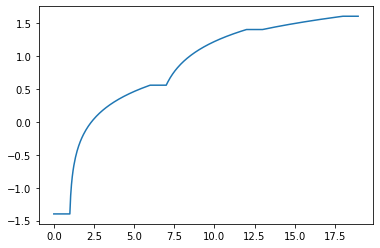

In [50]:
dist = Stage()
dist.add(Act(0.04, 0.04, 1))
dist.add(Act(0.04, 3.595, 5))
dist.add(Act(3.595, 3.595, 1))
dist.add(Act(3.595, 25.15, 5))
dist.add(Act(25.15, 25.15, 1))
dist.add(Act(25.15, 40.0, 5))
dist.add(Act(40.0, 40.0, 1))

print(dist.total_time())

t = np.arange(0,dist.total_time(),0.05)

# see what the animation variables will look like (note the logarithm because of how near to far field diffraction changes)
plt.plot(t, np.log10(dist.t(t)))


In [ ]:
total_time_animation = dist.total_time() # seconds
frame_rate = 20          # frames per second
total_frames = total_time_animation * frame_rate # seconds

plt.figure(figsize=(8,4))

anim = FFMpegWriter('near_and_far_{}.mp4'.format(anim_version), framerate=frame_rate)

times = np.arange(0,total_time_animation, 1./frame_rate)

di = dist.t(times)

for t in progressbar(range(np.int(total_frames))):
    
    
    fresnel_prop = FresnelPropagator(pupil_grid_2, di[t])

    wf = Wavefront(aperture_2, 500e-9)
    img = fresnel_prop(wf)

    
    plt.clf()

    plt.suptitle('Circular aperture, $d=1cm$, $\lambda=500nm$',fontsize=20)

    plt.subplot(1,2,1)

    imshow_field(img.intensity)
    plt.xticks(ticks=(-0.005,0,0.005), labels=(-5,0,5),fontsize=16)
    plt.yticks(ticks=(-0.005,0,0.005), labels=(-5,0,5),fontsize=16)

    plt.text(0.05,0.05,anim_version, fontsize=12, color='white',
            horizontalalignment='left', verticalalignment='bottom',
            transform=plt.gca().transAxes)

    plt.text(0.05,0.90,'$z={:.0f}mm$'.format(di[t]*1000.), fontsize=16, color='white',
            horizontalalignment='left', verticalalignment='bottom',
            transform=plt.gca().transAxes)
    plt.xlabel('X [mm]',fontsize=14)
    plt.ylabel('Y [mm]',fontsize=14)


    plt.subplot(1,2,2)
    imshow_field(img.intensity)
    plt.xlim(-0.001, 0.001)
    plt.ylim(-0.001, 0.001)

    plt.gca().yaxis.tick_right()
    plt.gca().yaxis.set_label_position('right')

    plt.xticks(ticks=(-0.0005,0,0.0005), labels=(-0.5,0,0.5),fontsize=16)
    plt.yticks(ticks=(-0.0005,0,0.0005), labels=(-0.5,0,0.5),fontsize=16)
    plt.xlabel('X [mm]',fontsize=14)
    plt.ylabel('Y [mm]',fontsize=14)

    plt.text(0.95,0.05,"@mattkenworthy", fontsize=12, color='white',
        horizontalalignment='right', verticalalignment='bottom',
        transform=plt.gca().transAxes)


    anim.add_frame()

plt.close()
anim.close()

# Show created animation
anim
    


# Convert to animated gif

Command line to convert it from .mp4 to an animated GIF. Caution - GIF may be larger than the mp4!

In [ ]:
!ffmpeg -i near_and_far_v1.mp4 -vf "fps=20,scale=600:-1:flags=lanczos" -c:v pam -f image2pipe - | convert -delay 10 - -loop 0 -layers optimize near_and_far_v1.gif